## Assignment - 7 5/11/24

## Topic Modeling

## Open the file

In [2]:
import pandas as pd
file = "C:\\Users\\mchow\\OneDrive\\Pictures\\Desktop\\Big data analytics\\titanic.csv"
df = pd.read_csv(file)
df.head(20) 

pclass  survived                                               name  \
0        1         1                      Allen, Miss. Elisabeth Walton   
1        1         1                     Allison, Master. Hudson Trevor   
2        1         0                       Allison, Miss. Helen Loraine   
3        1         0               Allison, Mr. Hudson Joshua Creighton   
4        1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5        1         1                                Anderson, Mr. Harry   
6        1         1                  Andrews, Miss. Kornelia Theodosia   
7        1         0                             Andrews, Mr. Thomas Jr   
8        1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9        1         0                            Artagaveytia, Mr. Ramon   
10       1         0                             Astor, Col. John Jacob   
11       1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
12       1         1                      Aubart, Mme. Leontine Pauline   
13       1         1                       Barber, Miss. Ellen 'Nellie'   
14       1         1               Barkworth, Mr. Algernon Henry Wilson   
15       1         0                                Baumann, Mr. John D   
16       1         0                           Baxter, Mr. Quigg Edmond   
17       1         1    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   
18       1         1                              Bazzani, Miss. Albina   
19       1         0                               Beattie, Mr. Thomson   

       sex     age  sibsp  parch    ticket      fare    cabin embarked boat  \
0   female      29      0      0     24160  211.3375       B5        S    2   
1     male  0.9167      1      2    113781    151.55  C22 C26        S   11   
2   female       2      1      2    113781    151.55  C22 C26        S    ?   
3     male      30      1      2    113781    151.55  C22 C26        S    ?   
4   female      25      1      2    113781    151.55  C22 C26        S    ?   
5     male      48      0      0     19952     26.55      E12        S    3   
6   female      63      1      0     13502   77.9583       D7        S   10   
7     male      39      0      0    112050         0      A36        S    ?   
8   female      53      2      0     11769   51.4792     C101        S    D   
9     male      71      0      0  PC 17609   49.5042        ?        C    ?   
10    male      47      1      0  PC 17757   227.525  C62 C64        C    ?   
11  female      18      1      0  PC 17757   227.525  C62 C64        C    4   
12  female      24      0      0  PC 17477      69.3      B35        C    9   
13  female      26      0      0     19877     78.85        ?        S    6   
14    male      80      0      0     27042        30      A23        S    B   
15    male       ?      0      0  PC 17318    25.925        ?        S    ?   
16    male      24      0      1  PC 17558  247.5208  B58 B60        C    ?   
17  female      50      0      1  PC 17558  247.5208  B58 B60        C    6   
18  female      32      0      0     11813   76.2917      D15        C    8   
19    male      36      0      0     13050   75.2417       C6        C    A   

   body                        home.dest  
0     ?                     St Louis, MO  
1     ?  Montreal, PQ / Chesterville, ON  
2     ?  Montreal, PQ / Chesterville, ON  
3   135  Montreal, PQ / Chesterville, ON  
4     ?  Montreal, PQ / Chesterville, ON  
5     ?                     New York, NY  
6     ?                       Hudson, NY  
7     ?                      Belfast, NI  
8     ?              Bayside, Queens, NY  
9    22              Montevideo, Uruguay  
10  124                     New York, NY  
11    ?                     New York, NY  
12    ?                    Paris, France  
13    ?                                ?  
14    ?                    Hessle, Yorks  
15    ?                     New York, NY  
16    ?                     Montreal,

## We will split speech into sentences

In [ ]:
import re
df["paragraphs"] = df["description"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

## Start by getting TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert stop words set to a list
stopwords_list = list(stopwords)

# Initialize TfidfVectorizer with the list of stop words
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['description'])
tfidf_text_vectors.shape

(129971, 12230)

## Make a data frame of sentences

In [ ]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "description": paragraph, "year": year }
for paragraphs, year in zip(df["paragraphs"], df["price"])
for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

description  year
0  Aromas include tropical fruit, broom, brimston...   NaN
1  This is ripe and fruity, a wine that is smooth...  15.0
2  Tart and snappy, the flavors of lime flesh and...  14.0
3  Pineapple rind, lemon pith and orange blossom ...  13.0
4  Much like the regular bottling from 2012, this...  65.0
5  Blackberry and raspberry aromas show a typical...  15.0
6  Here's a bright, informal red that opens with ...  16.0
7  This dry and restrained wine offers spice in p...  24.0
8  Savory dried thyme notes accent sunnier flavor...  12.0
9  This has great depth of flavor with its fresh ...  27.0

## Get the TFIDF of the sentences DF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Use 'english' instead of the set of stop words
tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["description"])
tfidf_para_vectors.shape

(129971, 12222)

## NMF

In [ ]:
from sklearn.decomposition import NMF
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

## Let’s look at our 10 topics:

In [ ]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],
                                   abs(words[largest[i]] * 100.0 / total)))

# Call the function outside its definition with the appropriate arguments
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
 black (8.01)
 pepper (2.39)
 dark (2.18)
 blackberry (2.04)
 currant (1.72)

Topic 01
 wine (3.57)
 fruits (2.69)
 tannins (1.95)
 wood (1.92)
 drink (1.82)

Topic 02
 apple (2.24)
 white (1.87)
 peach (1.61)
 lemon (1.53)
 citrus (1.51)

Topic 03
 cherry (2.37)
 palate (2.07)
 alongside (2.03)
 tannins (1.96)
 offers (1.91)

Topic 04
 crisp (4.34)
 fruity (4.00)
 acidity (3.88)
 light (3.79)
 fresh (3.35)

Topic 05
 cabernet (7.05)
 sauvignon (4.83)
 blend (4.41)
 merlot (3.97)
 franc (2.83)

Topic 06
 finish (2.62)
 berry (2.59)
 plum (2.40)
 aromas (2.03)
 herbal (1.95)

Topic 07
 ripe (8.90)
 soft (8.12)
 texture (3.54)
 smooth (3.45)
 drink (3.04)

Topic 08
 fruit (8.07)
 spice (1.79)
 barrel (1.15)
 wine (1.14)
 notes (0.93)

Topic 09
 sweet (1.94)
 flavors (1.76)
 oak (1.56)
 dry (1.31)
 pinot (1.24)


## Run same model

In [ ]:
from sklearn.decomposition import NMF

# Initialize NMF model
nmf_para_model = NMF(n_components=10, random_state=42)

# Fit NMF model to the TF-IDF vectors
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_

# Display topics
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
 black (8.05)
 pepper (2.41)
 dark (2.18)
 blackberry (2.04)
 currant (1.72)

Topic 01
 wine (3.55)
 fruits (2.68)
 tannins (1.95)
 wood (1.91)
 drink (1.82)

Topic 02
 apple (2.24)
 white (1.87)
 peach (1.61)
 lemon (1.53)
 citrus (1.51)

Topic 03
 cherry (2.37)
 palate (2.07)
 alongside (2.03)
 tannins (1.96)
 offers (1.91)

Topic 04
 crisp (4.30)
 fruity (3.97)
 acidity (3.85)
 light (3.74)
 fresh (3.32)

Topic 05
 cabernet (7.06)
 sauvignon (4.84)
 blend (4.42)
 merlot (3.98)
 franc (2.83)

Topic 06
 finish (2.62)
 berry (2.59)
 plum (2.40)
 aromas (2.03)
 herbal (1.95)

Topic 07
 ripe (8.85)
 soft (8.08)
 texture (3.52)
 smooth (3.44)
 drink (2.98)

Topic 08
 fruit (8.01)
 spice (1.77)
 barrel (1.14)
 wine (1.13)
 notes (0.92)

Topic 09
 sweet (1.92)
 flavors (1.76)
 oak (1.54)
 dry (1.32)
 pinot (1.23)


## How “BIG” is each topic?

In [ ]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([ 6.80537532, 12.17113048, 12.46332027, 10.48142749,  9.57763132,
        6.67283315,  9.29043226,  9.13216334, 12.17171346, 11.23397291])

## Topic sizes:

In [ ]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([ 6.814309  , 12.1952096 , 12.44555617, 10.40147373,  9.61564059,
        6.64254504,  9.21641592,  9.08355392, 12.15791526, 11.42738078])

## RUN this code:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the set of stopwords to a list
stopwords_list = list(stopwords)

# Assuming 'paragraph_df' is defined earlier
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["description"])

# Check the shape of the document-term matrix
print("Shape of document-term matrix:", count_para_vectors.shape)

# Define and fit the LDA model
lda_para_model = LatentDirichletAllocation(n_components=10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

Shape of document-term matrix: (129971, 12230)


## Start by cutting the paragraphs into words:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the stop words set to a list
stopwords_list = list(stopwords)

# Initialize CountVectorizer with the list of stop words
count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["description"])
print(count_para_vectors.shape)

(129971, 12230)


## Run the LDA

In [ ]:
def display_topics(model, feature_names, no_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Get feature names from the vocabulary generated by CountVectorizer
feature_names = count_para_vectorizer.get_feature_names_out()

# Display topics using the vocabulary generated by CountVectorizer
display_topics(lda_para_model, feature_names)


Topic 1:
wine fruit aromas spice cherry

Topic 2:
flavors wine acidity lemon oak

Topic 3:
wine light palate flavors fruit

Topic 4:
palate tannins black cherry aromas

Topic 5:
cabernet blend fruit sauvignon merlot

Topic 6:
flavors finish aromas berry plum

Topic 7:
palate aromas white apple acidity

Topic 8:
flavors wine aromas finish citrus

Topic 9:
wine drink acidity ripe fruit

Topic 10:
wine fruit black flavors cherry


## Topic sizes

In [ ]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 6.04525727,  8.70003267,  9.55606275,  8.17037455,  7.39475983,
       13.97793135,  7.43818511,  9.79669538, 17.60508085, 11.31562023])

## The amazing pyLDAvis!

In [ ]:
pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


## draw wordclouds for the 10 topics

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

/var/folders/5g/277wtpf90l59q6v17xfw76h00000gn/T/ipykernel_36317/1084829249.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## The NMF wordclouds:

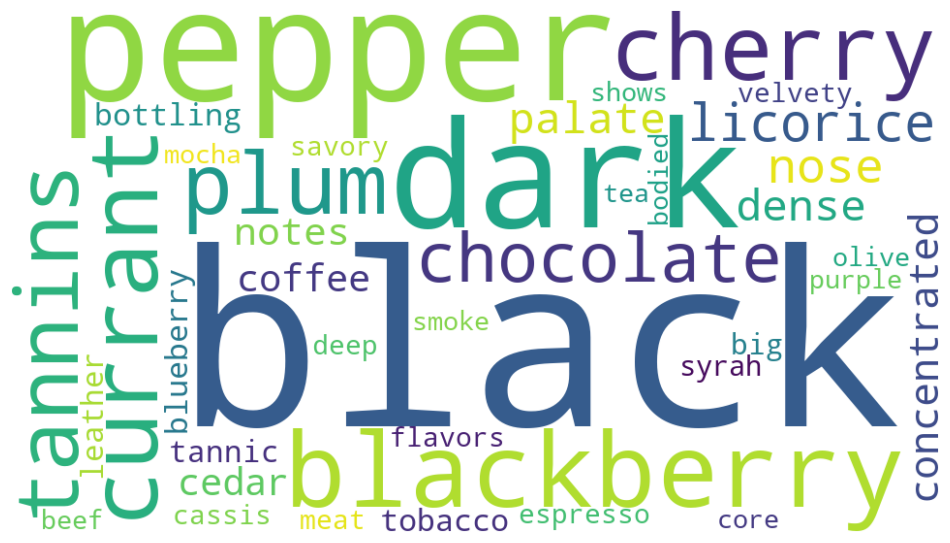

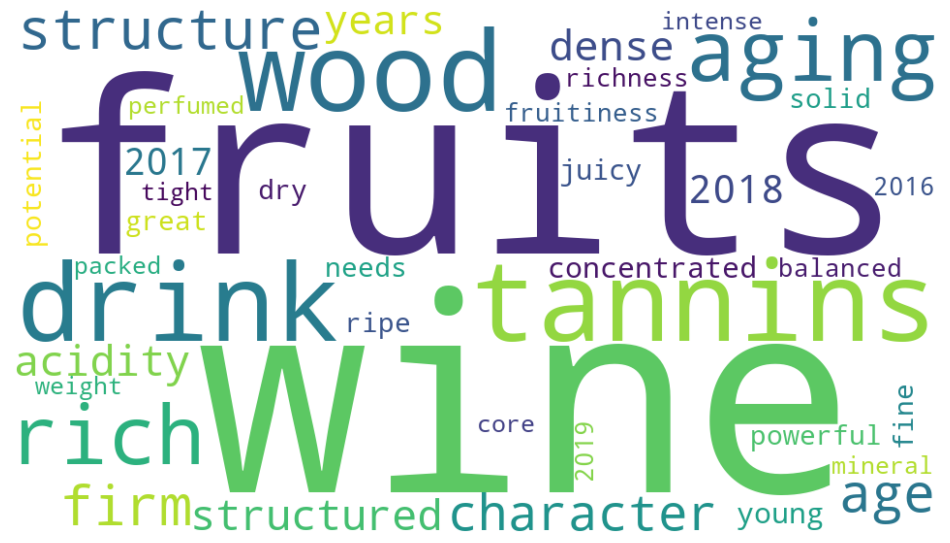

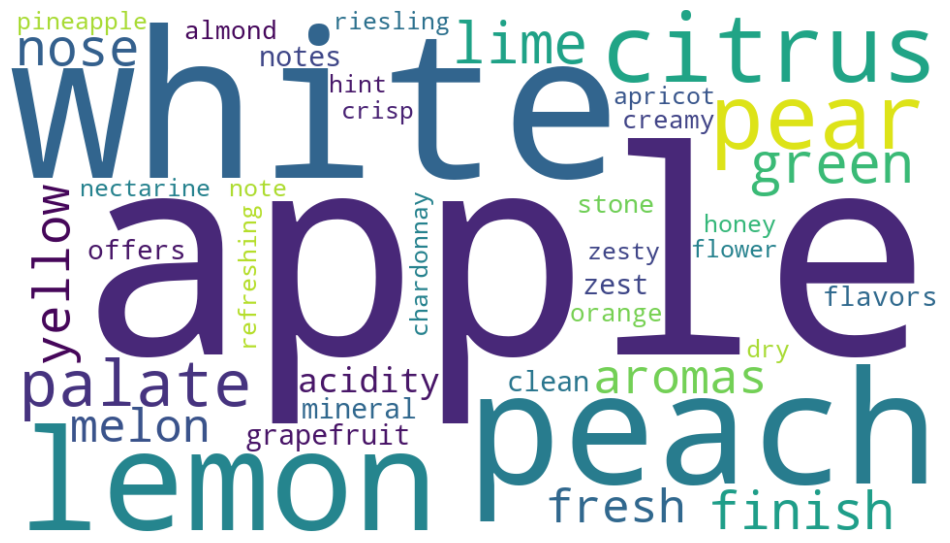

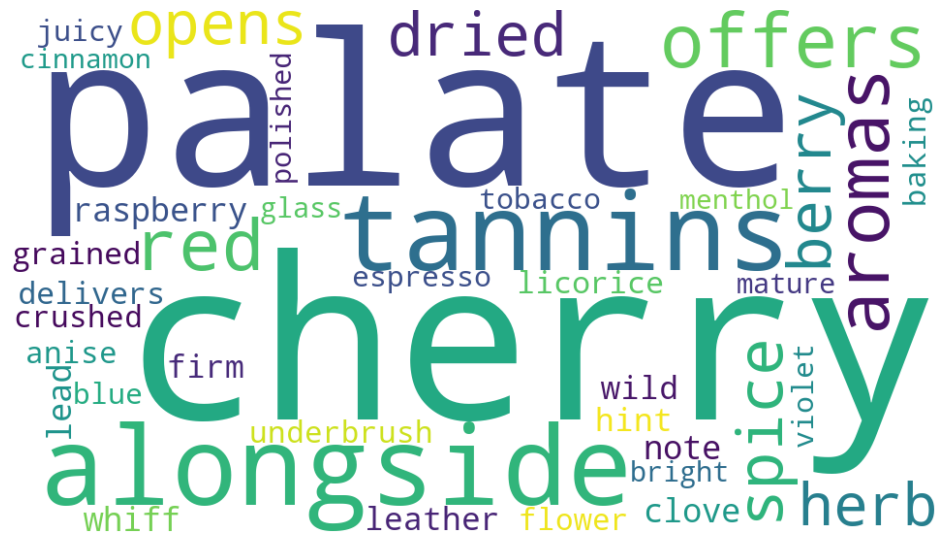

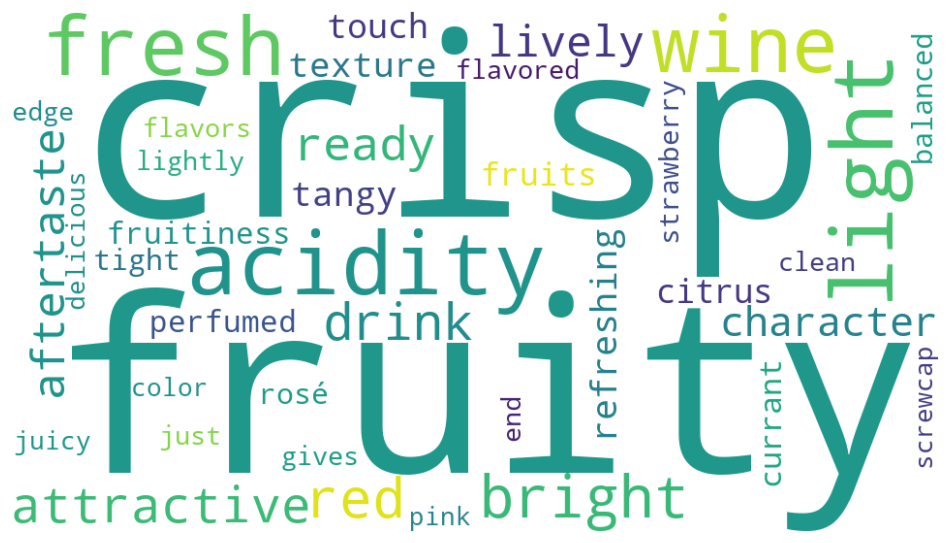

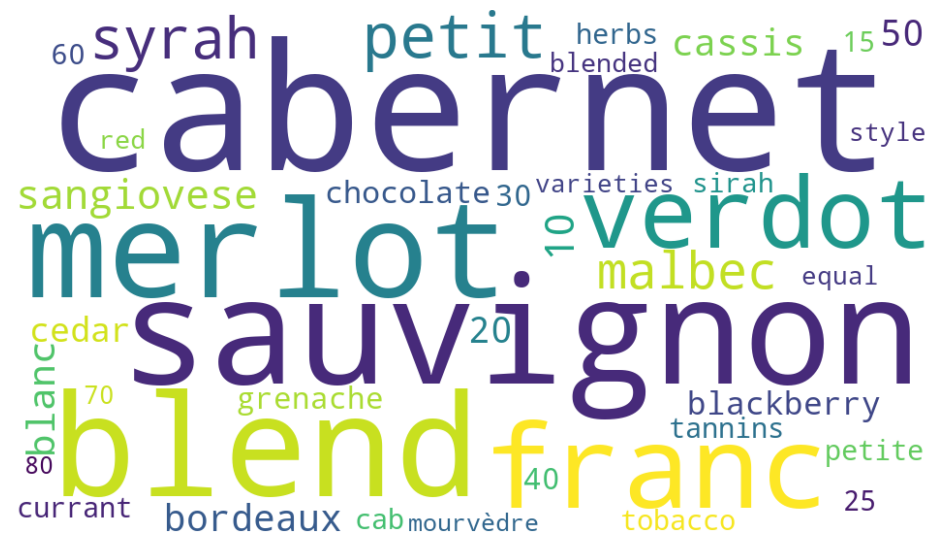

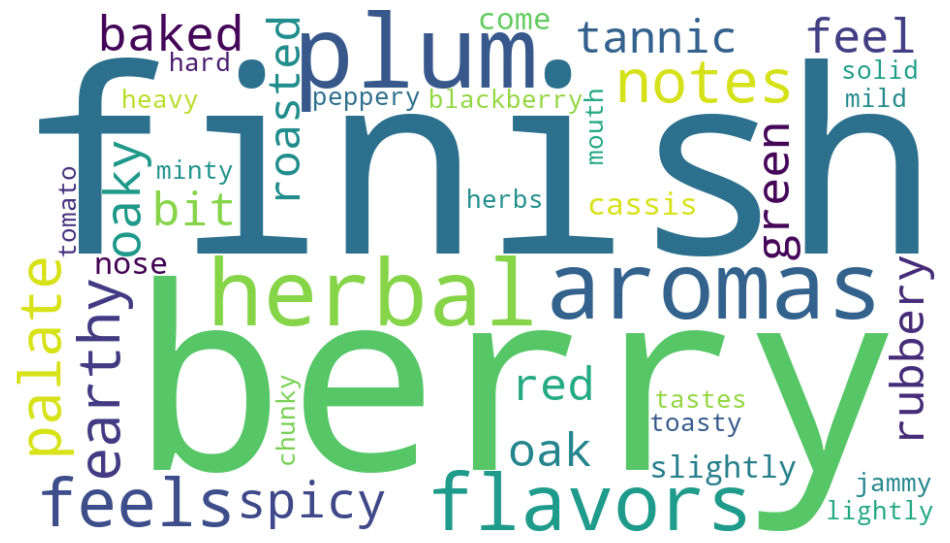

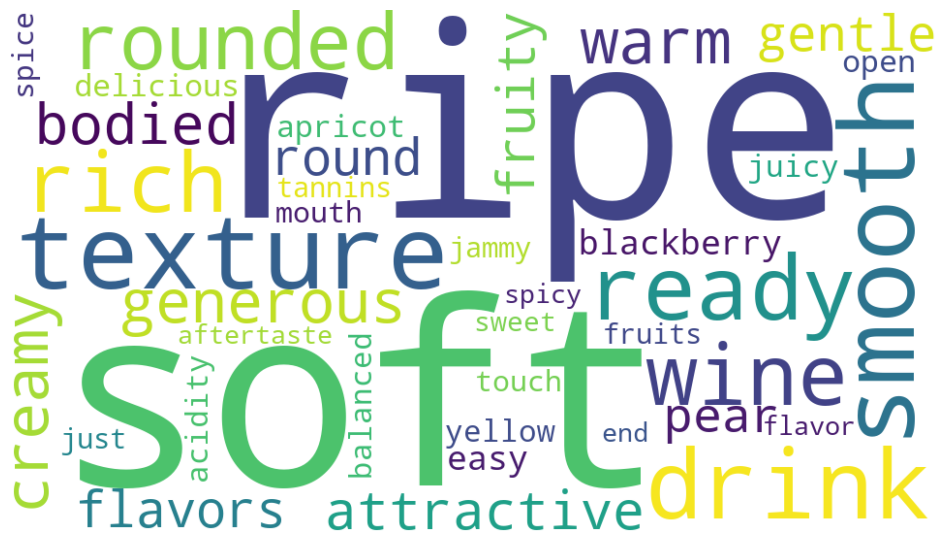

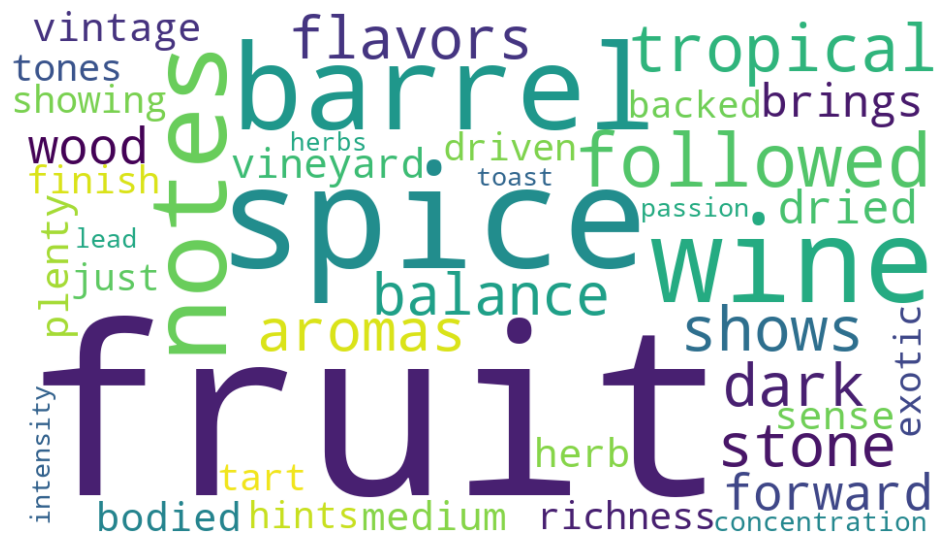

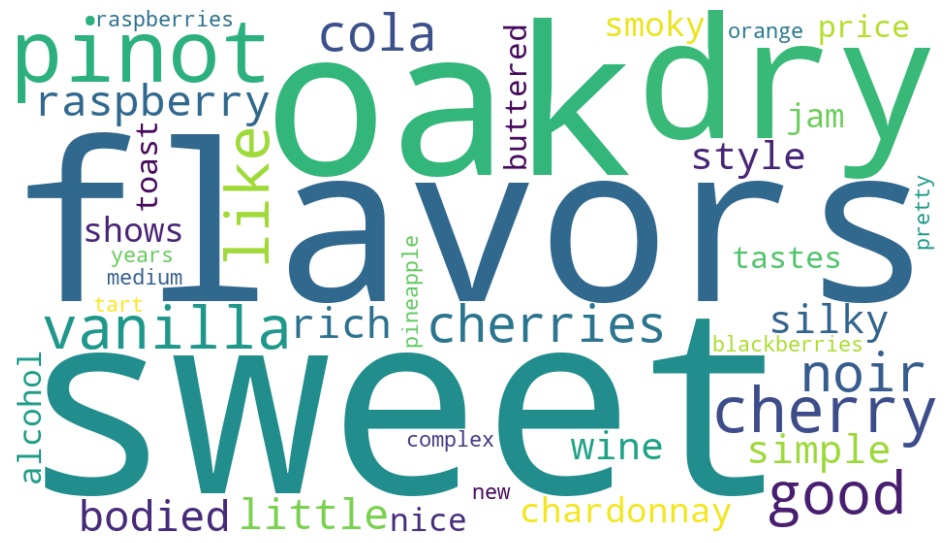

In [ ]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

## The LDA wordclouds

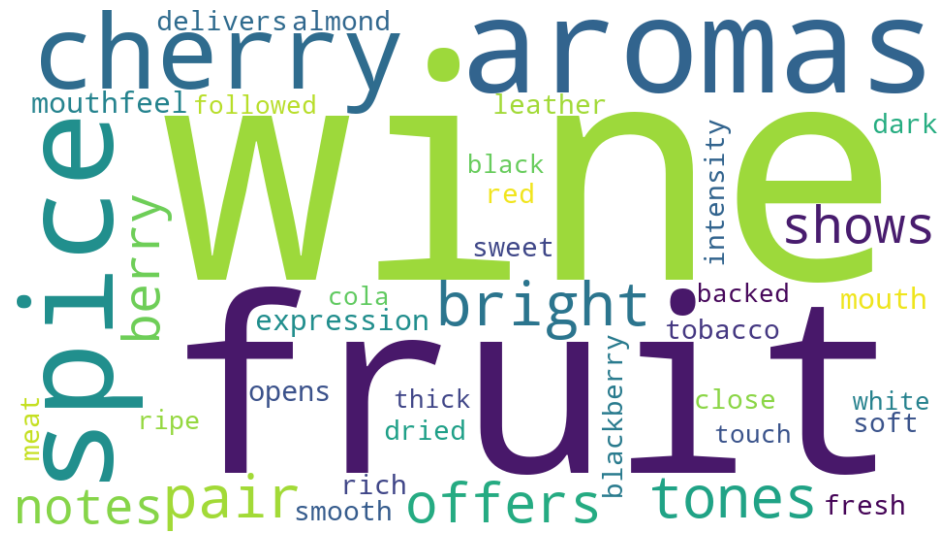

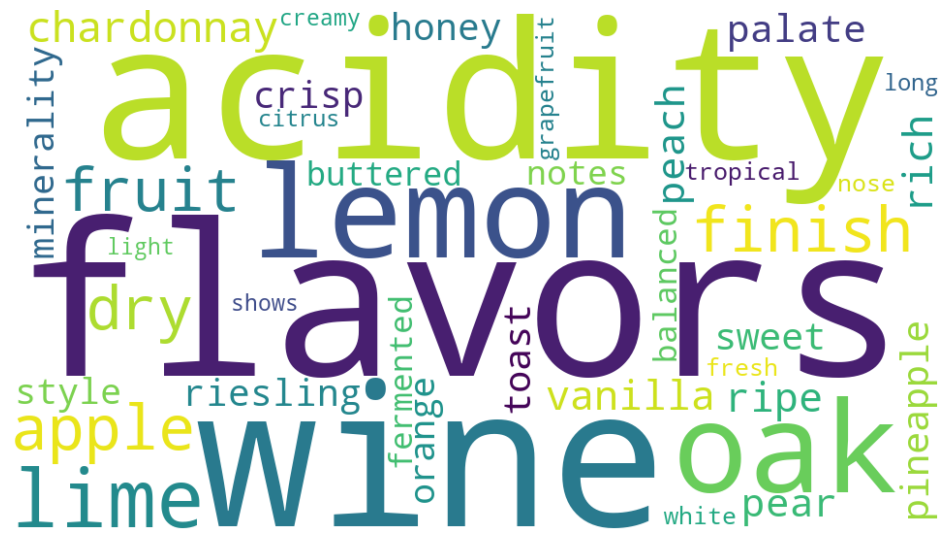

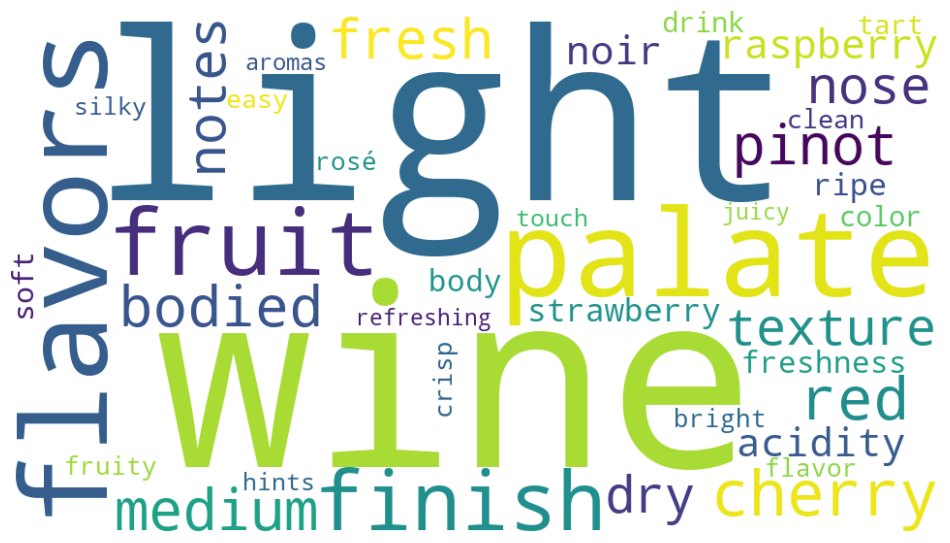

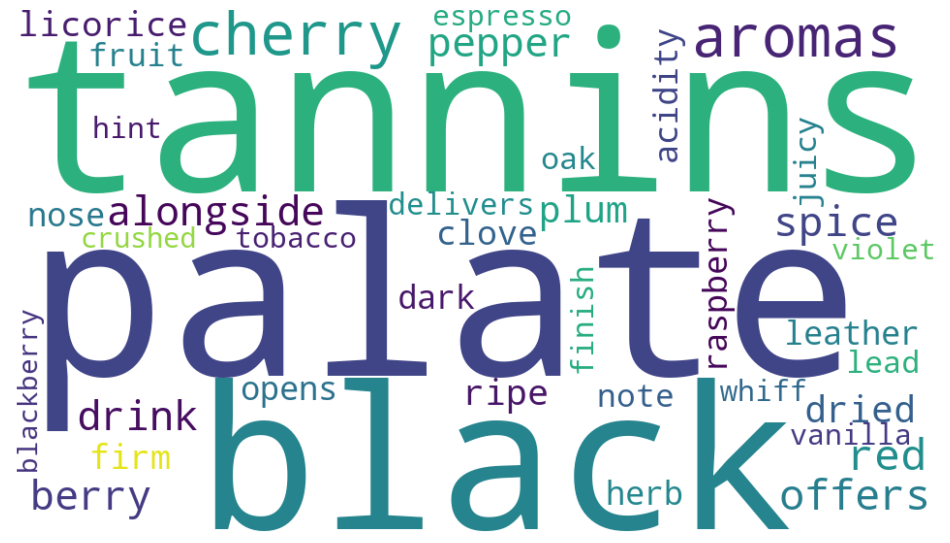

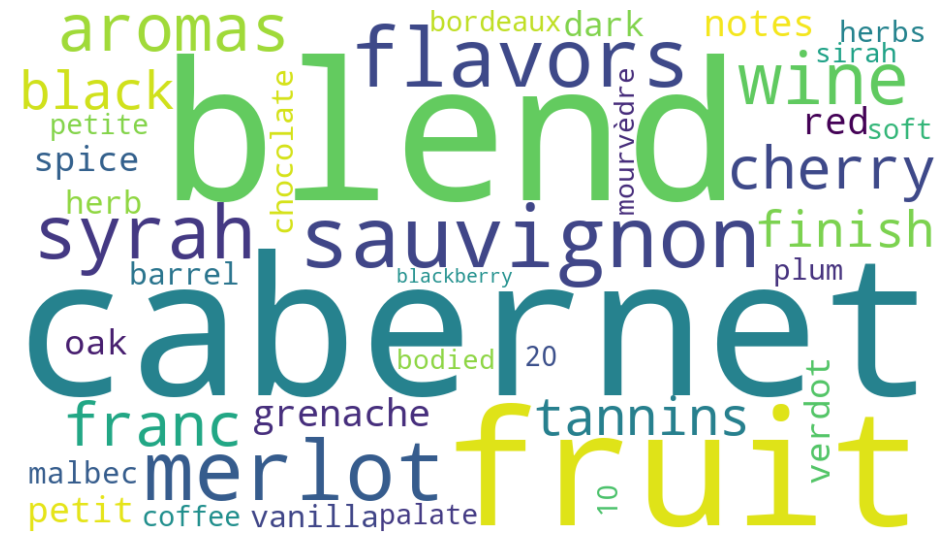

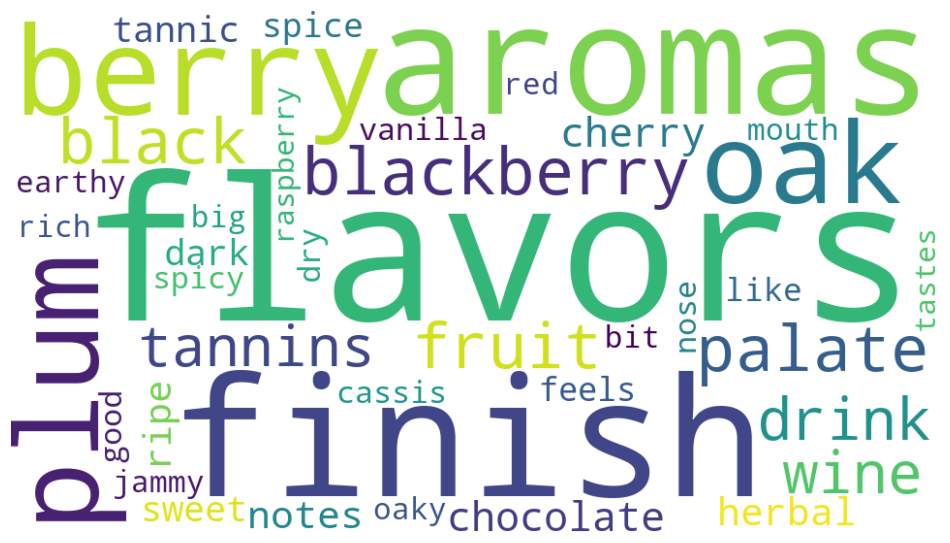

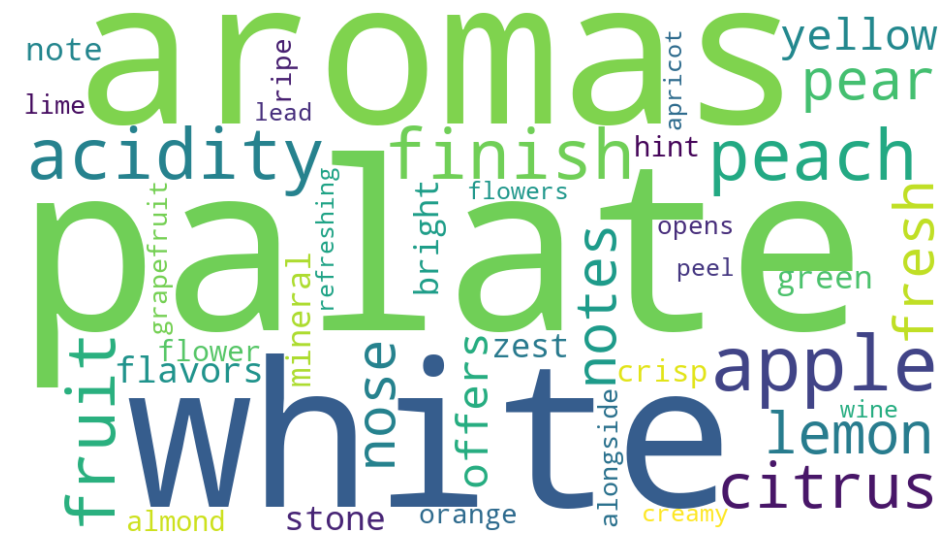

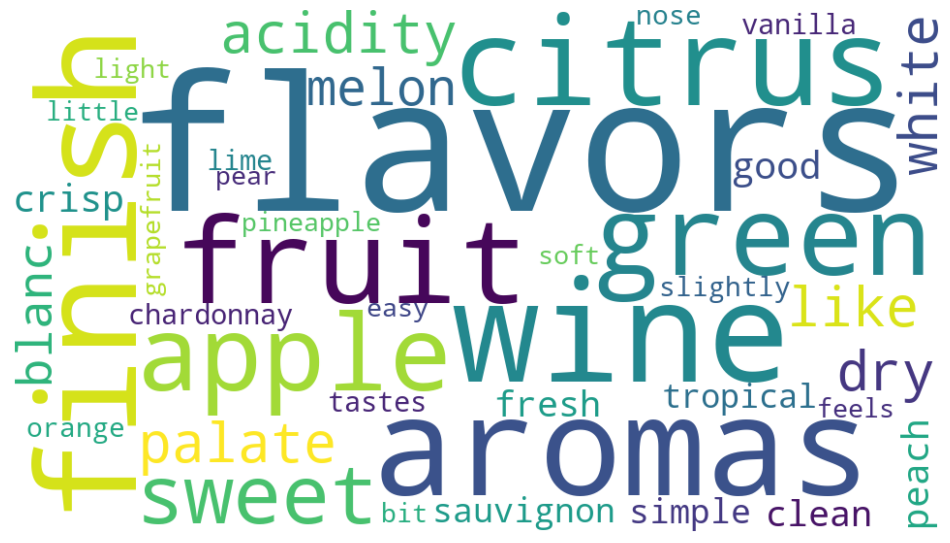

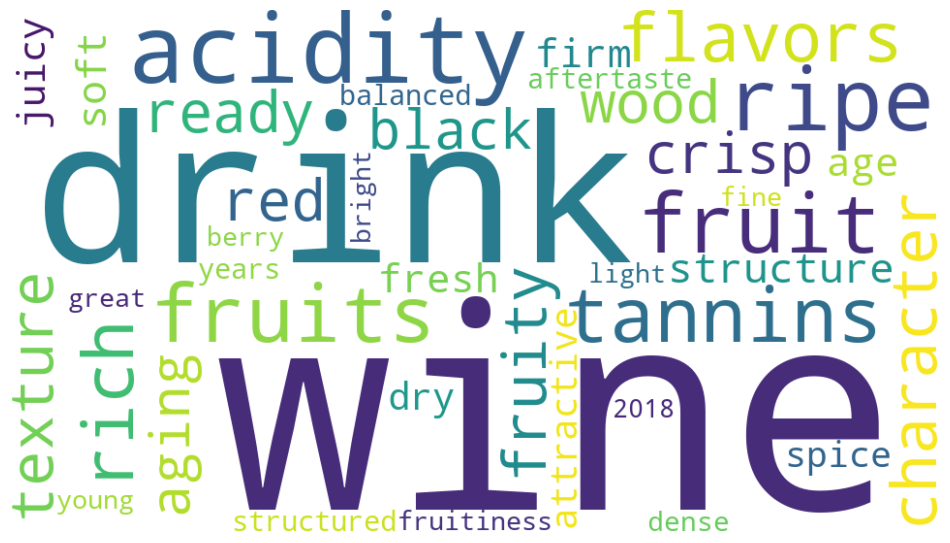

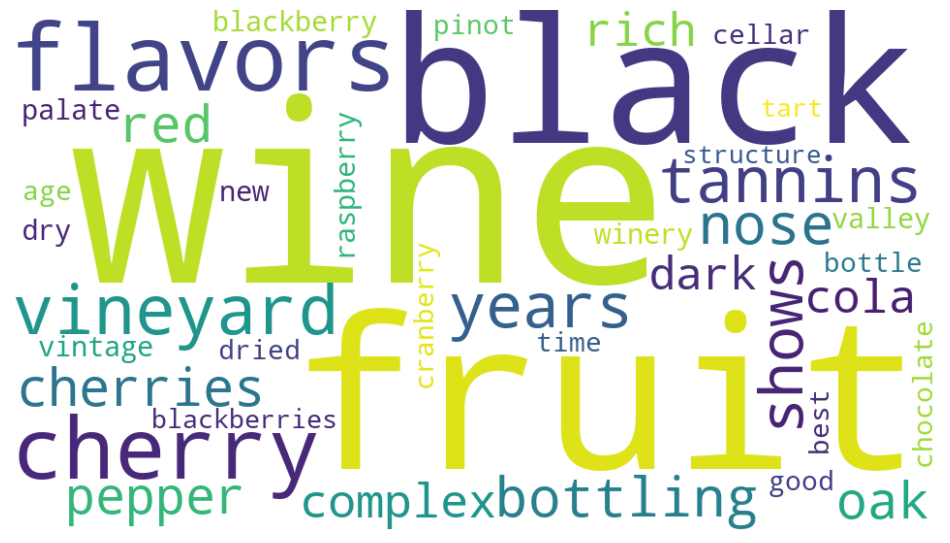

In [ ]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

In [ ]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

## Separate data by year

In [ ]:
from tqdm.auto import tqdm
import numpy as np

year_data = []

unique_years = np.unique(paragraph_df["year"])

for year in tqdm(unique_years):
    year_indices = np.array(paragraph_df["year"] == year)
    if np.any(year_indices):  # Check if there are samples available for the current year
        W_year = nmf_para_model.transform(tfidf_para_vectors[year_indices])
        year_data.append([year] + list(W_year.sum(axis=0) / W_year.sum() * 100.0))

/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/opt/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecate

  0%|          | 0/391 [00:00<?, ?it/s]

## Draw time chart

<Axes: xlabel='price'>

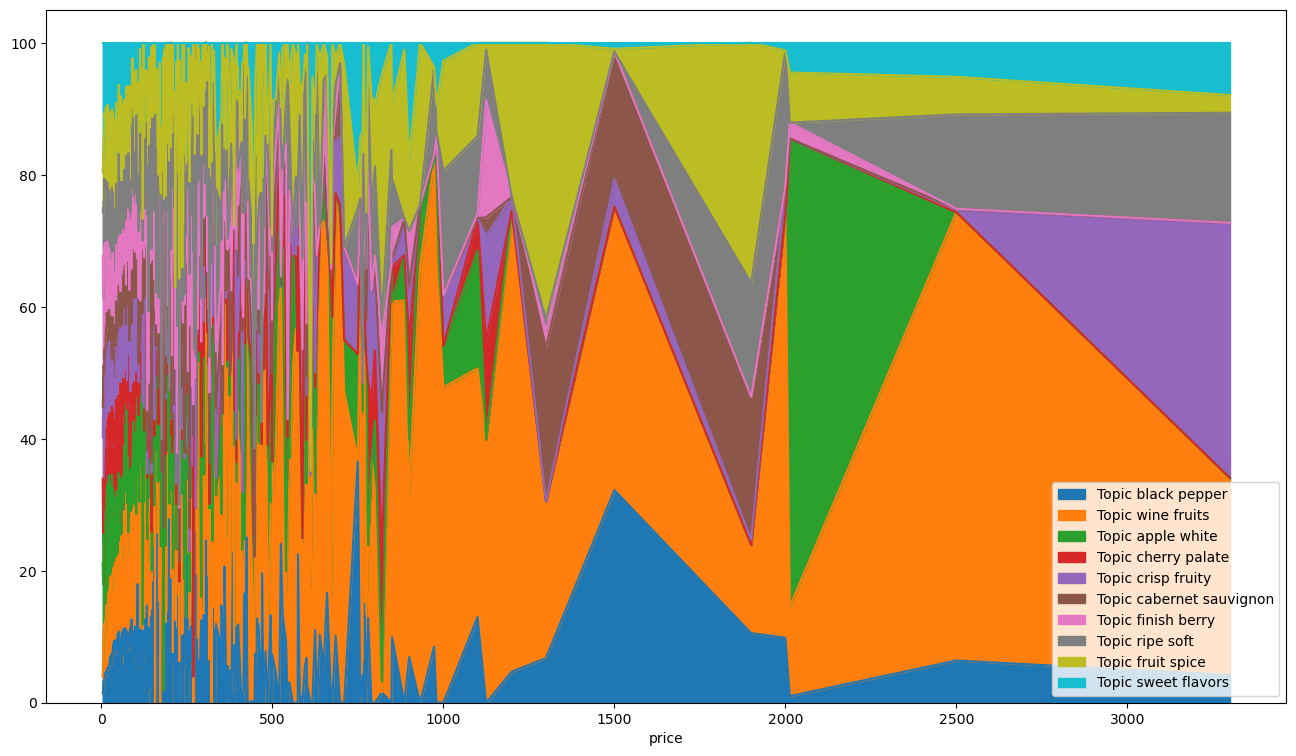

In [ ]:
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["price"] +
topic_names).set_index("price")
df_year.plot.area(figsize=(16,9))